# Youtube Video Statistics

<i>YouTube (the world -famous video sharing website) maintains a list of the top trending videos on the platform . According to Variety magazine , to determine the year's top trending videos , YouTube uses a combination of factors including measuring users interactions (number of views , shares , comments and likes) .Note : that they're not the most - viewed videos overall for the calendar year<i>

## Problem Statement 

<i>Read the youtube data and perform exploratory data analysis<i>

## Dataset Information

This dataset is the daily record from the top trending YouTube videos . Top 200 trending videos of a given day. Original Data was collected during 14th 
November 2017 & 5th March 2018(though, data for January 10th & 11th of 2017 is missing). Original dataset was collected by Youtube API.

## Variable Description

<table>
    <tr><th>Column</th><th>Description</th></tr>
    <tr><td>Video_Id</td><td>Unique Indentity which tells the video_id of each subscribed video </td></tr>
    <tr><td>Category_Id</td><td>Unique number assigned to each category of the video</td></tr>
    <tr><td>Channel_Title</td><td>Title of youtube channel of the video</td></tr>
    <tr><td>Subscriber</td><td>Count of all subscribers for the respective video</td></tr>
    <tr><td>Title</td><td>Title of the video</td></tr>
    <tr><td>Tags</td><td>Tags are descriptive keywords you can add to your video to help viewers find your content</td></tr>
    <tr><td>Description</td><td>Description of the respective video</td></tr>
    <tr><td>Trend_day_count</td><td>Trending day count for respective video</td></tr>
    <tr><td>Tag_count</td><td>Tag count for the respective video </td></tr>
    <tr><td>Trend_tag_count</td><td>Tag count for respective trending video</td></tr>
    <tr><td>Comment_count</td><td>Count of Comments for particular video</td></tr>
    <tr><td>Comment_disabled</td><td>It represents the boolean value . True represents comments are enabled and False represents comments are disabled</td></tr>
    <tr><td>Like dislike disabled</td><td>It represents the boolean value . True represents like and dislike are enabled and False represents comments are disabled</td></tr>
    <tr><td>Likes</td><td>Number of Likes for particular video</td></tr>
    <tr><td>Dislikes</td><td>Number of Disikes for particular video</td></tr>
    <tr><td>Tag appeared in Title</td><td>It represents the boolean value . True represents that the respective tag has appeared in a particular video. False represents that the respective tag has not appeared in particular video</td></tr>
    <tr><td>views</td><td>Target variable . Number of veiws for  particular video</td></tr>
</table>

# Importing Libraries

In [1]:
%matplotlib inline


import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

from sklearn.preprocessing import LabelEncoder,OneHotEncoder

 
from scipy.stats import mode,kurtosis,skew





# Data Cleaning (Column By Column)

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.drop(['Unnamed: 17','Unnamed: 18'],axis=1,inplace=True)

In [4]:
train.head()

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views
0,HDR9SQc79,22,CaseyNeistat,9086142.0,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,6.0,21,6,,FALSE,FALSE,13342,6089,False,1978978
1,KNH52UF?48,24,LastWeekTonight,5937292.0,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",1.0,23,1,116266,TRUE,FALSE,5761,3044,False,1487870
2,QTW28IRG36,23,Rudy Mancuso,4191209.0,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,10.0,22,3,257850,TRUE,TRUE,0,0,True,1502102
3,MGL76WI]26,24,Good Mythical Morning,13186408.0,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,Today we find out if Link is a Nickelback amat...,12.0,17,5,263939,TRUE,TRUE,0,0,True,3519302
4,TWP93KXT70,24,nigahiga,20563106.0,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,I know it's been a while since we did this sho...,11.0,15,7,268085,TRUE,TRUE,0,0,True,4835374


In [5]:
len(train)

3198

In [6]:
train.describe()

,subscriber,Trend_day_count
count,3.175000e+03,3197.000000
mean,3.823981e+06,7.964342
std,2.865771e+07,78.556055
min,0.000000e+00,0.000000
25%,2.428800e+05,4.000000
50%,1.241220e+06,7.000000
75%,3.812622e+06,10.000000
max,1.576229e+09,4444.000000


<AxesSubplot:>

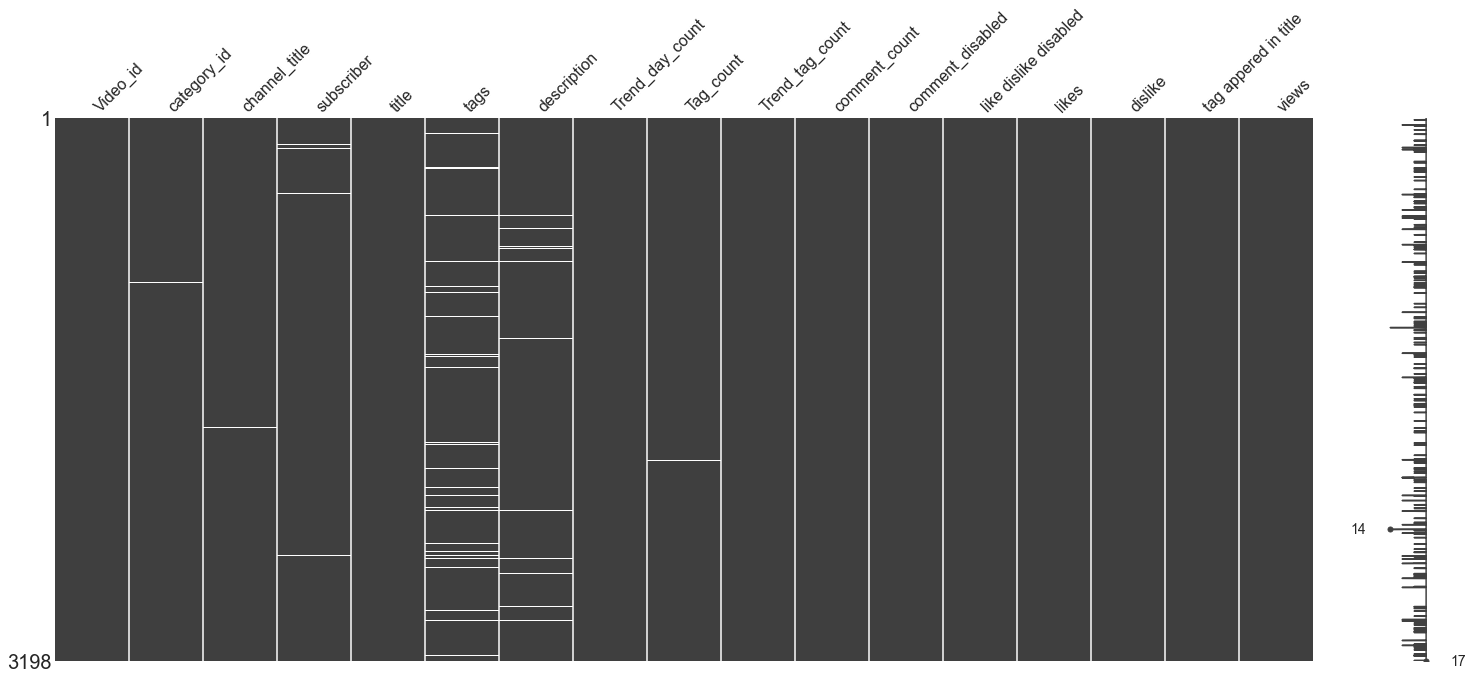

In [7]:
missingno.matrix(train)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Video_id               3198 non-null   object 
 1   category_id            3192 non-null   object 
 2   channel_title          3195 non-null   object 
 3   subscriber             3175 non-null   float64
 4   title                  3195 non-null   object 
 5   tags                   3046 non-null   object 
 6   description            3133 non-null   object 
 7   Trend_day_count        3197 non-null   float64
 8   Tag_count              3197 non-null   object 
 9   Trend_tag_count        3197 non-null   object 
 10  comment_count          3198 non-null   object 
 11  comment_disabled       3198 non-null   object 
 12  like dislike disabled  3198 non-null   object 
 13  likes                  3198 non-null   object 
 14  dislike                3198 non-null   object 
 15  tag 

In [9]:
train.isna().sum()

Video_id                   0
category_id                6
channel_title              3
subscriber                23
title                      3
tags                     152
description               65
Trend_day_count            1
Tag_count                  1
Trend_tag_count            1
comment_count              0
comment_disabled           0
like dislike disabled      0
likes                      0
dislike                    0
tag appered in title       1
views                      0
dtype: int64

# Category ID

In [10]:
train['category_id'].unique()

array(['22', '24', '23', '28', '1', '25', '17', '10', '15', '27', '26',
       '2', '19', '20', nan, '29', '“24', '43'], dtype=object)

<AxesSubplot:xlabel='count', ylabel='category_id'>

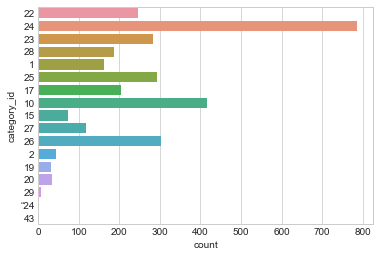

In [11]:
sns.countplot(data=train,y='category_id')

In [12]:
train[train['category_id'].str.find('“24')!=-1]

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views
187,HCQ73RZo7,NaN,Chicago Sun-Times,11133.0,Obama arrives for jury duty at Daley Center,NaN,Watch former President Barack Obama greet othe...,4.0,10,5,213427,TRUE,FALSE,14535,10728,False,537701
595,NLM1FZ>80,NaN,The Infographics Show,1607518.0,How Likely Are You to Die During a Black Frida...,black friday|black friday sales|How Likely Are...,🐻 Check out our new channel: Fuzzy & Nutz 🐿️ ►...,3.0,25,5,68068,TRUE,TRUE,0,0,True,517759
798,GKQ34HXG87,NaN,The Voice,5850161.0,The Voice 2017 - Team Miley: Man! I Feel Like ...,the voice|the voice nbc|the voice season 13|wa...,"Miley Cyrus joins Ashland Craft, Brooke Simpso...",12.0,14,6,72128,TRUE,FALSE,14302,10959,True,1687526
864,NCX50MJl16,NaN,Trailers Promos Teasers,18000.0,All The Money In The World - TV Spot featuring...,All The Money In The World|Christopher Plummer,All The Money In The World - The story of the ...,4.0,21,2,,FALSE,FALSE,15068,6486,True,123902
913,HOT6GH>20,NaN,IISuperwomanII,13357328.0,When You Catch Your Boyfriend (ft. Nick Jonas),iisuperwomanii|superwoman|team|super”|super|wo...,That moment when you awkwardly walk in and cat...,7.0,21,6,248173,TRUE,TRUE,0,0,True,3292905
972,HPR67IDa88,NaN,Shoshana Bean,24589.0,Taylor Swift - I Did Something Bad (Cover) | B...,taylor swift|reputation|acoustic|live|soul|pop...,Sho: @shobean\nCynthia: @cynthiaerivo\n\nShot ...,4.0,9,4,203113,TRUE,FALSE,21742,13223,False,580010
1691,DGQ85KL`7,“24,NaN,1676098.0,Mark Hamill Didn’t Tell Carrie Fisher the Big ...,Graham Norton|Graham Norton Show Official|Ente...,It’s impressive that he kept the secret for th...,12.0,12,7,,FALSE,FALSE,10275,8086,False,682724


In [13]:
train['category_id'] = train['category_id'].str.replace('“','',regex=True)

In [14]:
train.iloc[1691]

Video_id                                                         DGQ85KL`7
category_id                                                             24
channel_title                                                          NaN
subscriber                                                      1.6761e+06
title                    Mark Hamill Didn’t Tell Carrie Fisher the Big ...
tags                     Graham Norton|Graham Norton Show Official|Ente...
description              It’s impressive that he kept the secret for th...
Trend_day_count                                                         12
Tag_count                                                               12
Trend_tag_count                                                          7
comment_count                                                             
comment_disabled                                                     FALSE
like dislike disabled                                                FALSE
likes                    

In [15]:
train['category_id'].unique()

array(['22', '24', '23', '28', '1', '25', '17', '10', '15', '27', '26',
       '2', '19', '20', nan, '29', '43'], dtype=object)

In [16]:
train = train.dropna(subset=['category_id'])

In [17]:
train['category_id'].isna().sum()

0

In [18]:
len(train)

3192

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3192 entries, 0 to 3197
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Video_id               3192 non-null   object 
 1   category_id            3192 non-null   object 
 2   channel_title          3189 non-null   object 
 3   subscriber             3169 non-null   float64
 4   title                  3189 non-null   object 
 5   tags                   3041 non-null   object 
 6   description            3127 non-null   object 
 7   Trend_day_count        3191 non-null   float64
 8   Tag_count              3191 non-null   object 
 9   Trend_tag_count        3191 non-null   object 
 10  comment_count          3192 non-null   object 
 11  comment_disabled       3192 non-null   object 
 12  like dislike disabled  3192 non-null   object 
 13  likes                  3192 non-null   object 
 14  dislike                3192 non-null   object 
 15  tag 

<AxesSubplot:xlabel='count', ylabel='category_id'>

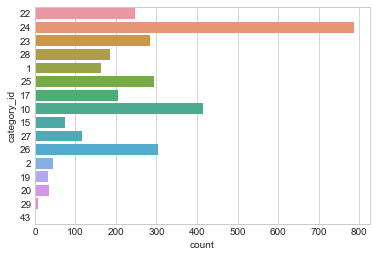

In [20]:
sns.countplot(data=train,y='category_id')

In [21]:
train['category_id'] = train['category_id'].astype('int64')
np.dtype(train['category_id'])

dtype('int64')

# Channel_title

In [22]:
train['channel_title'].isna().sum()

3

In [23]:
train = train.dropna(subset=['channel_title'])
len(train)

3189

In [24]:
train['channel_title'].isna().sum()

0

# Subscriber

In [25]:
train['subscriber'].isna().sum()

23

In [26]:
train = train.dropna(subset=['subscriber'])
len(train)



3166

# Title

In [27]:
train['title'].isna().sum()

3

In [28]:
train = train.dropna(subset=['title'])
len(train)

3163

# Trend Day Count 

In [29]:
train['Trend_day_count'].unique()

array([6.000e+00, 1.000e+00, 1.000e+01, 1.200e+01, 1.100e+01, 4.000e+00,
       9.000e+00, 8.000e+00, 7.000e+00, 5.000e+00, 3.000e+00, 2.000e+00,
       4.444e+03, 0.000e+00])

***4444 and 0 seems to be an outlier***

In [30]:
train[(train['Trend_day_count']==0) | (train['Trend_day_count']==4444)]


,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views
1952,KBC90MVa41,25,CBS This Morning,298962.0,"Senate passes historic GOP tax bill, House to ...",video|cbs|news|Senate|tax reform|House|Republi...,The Senate approved a historic tax reform bill...,4444.0,13,7,126241,TRUE,FALSE,13482,8034,False,450132
2024,ADD83ZOA32,22,BuzzFeedVideo,14889874.0,Binging With Babish Cooks Bob's Burgers For Fans,buzzfeed|buzzfeedvideo|binging with babish|bur...,"That's not a cartoon burger, that's like legit...",0.0,17,3,59958,TRUE,TRUE,0,0,True,3390169
2207,WQR72LXe78,25,CNN,3095131.0,Nikki Haley: 'We will never accept a nuclear N...,latest News|Happening Now|CNN|united nations|n...,US Ambassador to the United Nations Nikki Hale...,0.0,19,4,128744,TRUE,FALSE,12386,11936,True,1028936
2265,TXP42XQF41,1,The Atlantic,93238.0,The Challenge of True Solitude,the atlantic|winter|cold|isolation|ghosts|isla...,“You have to be at peace with the fact that so...,0.0,25,2,,FALSE,FALSE,20320,11714,False,154326


In [31]:
train.drop(train[(train['Trend_day_count']==0) | (train['Trend_day_count']==4444)].index, inplace = True) 
len(train)


3159

<AxesSubplot:xlabel='count', ylabel='Trend_day_count'>

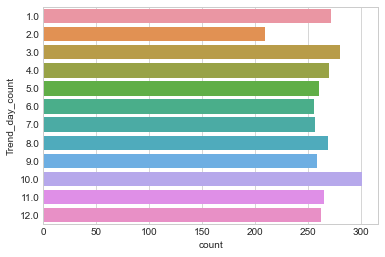

In [32]:
sns.countplot(data=train,y='Trend_day_count')

# Tag_count

In [33]:
train['Tag_count'].isna().sum()

1

In [34]:
train.dropna(subset=['Tag_count'],inplace=True)
len(train)

3158

In [35]:
train['Tag_count'].unique()
#Seems to be an error in tag_count of higher value

array(['21', '23', '22', '17', '15', '9', '14', '20', '8', '10', '18',
       '19', '25', '12', '24', '16', '11', '13', '3222', '3225', '0'],
      dtype=object)

In [36]:
train['Tag_count']=train['Tag_count'].astype('int64')
np.dtype(train['Tag_count'])

dtype('int64')

In [37]:
train.replace([3222,3225],mode(train['Tag_count'])[0][0],inplace=True)


In [38]:
train['Tag_count'].unique()

array([21, 23, 22, 17, 15,  9, 14, 20,  8, 10, 18, 19, 25, 12, 24, 16, 11,
       13,  0], dtype=int64)

<AxesSubplot:xlabel='count', ylabel='Tag_count'>

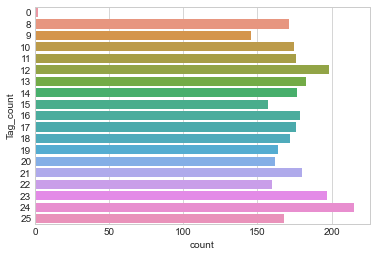

In [39]:
sns.countplot(data=train,y='Tag_count')

# Trend Tag Count

In [40]:
train['Trend_tag_count'].unique()

array(['6', '1', '3', '5', '7', '2', '4', nan, '>', '9903'], dtype=object)

In [41]:
train['Trend_tag_count'].isna().sum()

1

***> seems to be a typo error and 9903 is an outlier*** 

In [42]:
train[(train['Trend_tag_count']=='>') | (train['Trend_tag_count']=='9903')]

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views
85,DHG52DKE2,22,BuzzFeed Celeb,1360210.0,Mark Ruffalo Reads Hilarious Thirst Tweets,BuzzFeed|buzzfeed celeb|Mark Ruffalo|Thor|Ragn...,I'm just...I'm flattered.\n\nCredits: https://...,1.0,11,>,,FALSE,TRUE,0,0,True,300566
102,LOC2QLr9,23,Late Night with Seth Meyers,1968678.0,Mark Wahlberg's Kids Use Him for His Celeb Con...,Late Night|Seth Meyers|Mark Wahlberg|Kids|Cele...,Mark Wahlberg tells Seth how his kids want not...,12.0,24,9903,,FALSE,FALSE,4528,2031,True,754626


In [43]:
train.drop(train[(train['Trend_tag_count']=='>') | (train['Trend_tag_count']=='9903')].index, inplace = True) 
train = train.dropna(subset=['Trend_tag_count'])


In [44]:
train['Trend_tag_count']=train['Trend_tag_count'].astype('int64')
np.dtype(train['Trend_tag_count'])

dtype('int64')

In [45]:
train['Trend_tag_count'].unique()

array([6, 1, 3, 5, 7, 2, 4], dtype=int64)

In [46]:
len(train)

3155

# Comment Count

In [47]:
train['comment_count'].replace(' ',0,inplace=True)

In [48]:
train['comment_count']=train['comment_count'].astype('int64')
print(np.dtype(train['comment_count']))
train.head(20)

int64


,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views
0,HDR9SQc79,22,CaseyNeistat,9086142.0,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,6.0,21,6,0,FALSE,FALSE,13342,6089,False,1978978
1,KNH52UF?48,24,LastWeekTonight,5937292.0,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",1.0,23,1,116266,TRUE,FALSE,5761,3044,False,1487870
2,QTW28IRG36,23,Rudy Mancuso,4191209.0,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,10.0,22,3,257850,TRUE,TRUE,0,0,True,1502102
3,MGL76WI]26,24,Good Mythical Morning,13186408.0,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,Today we find out if Link is a Nickelback amat...,12.0,17,5,263939,TRUE,TRUE,0,0,True,3519302
4,TWP93KXT70,24,nigahiga,20563106.0,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,I know it's been a while since we did this sho...,11.0,15,7,268085,TRUE,TRUE,0,0,True,4835374
5,JDJ37HWR29,28,iJustine,4652602.0,2 Weeks with iPhone X,ijustine|week with iPhone X|iphone x|apple|iph...,Thanks for watching! Don't forget to subscribe...,10.0,9,1,198248,TRUE,FALSE,8619,3697,True,1580238
6,INH29DD?32,24,Saturday Night Live,5292034.0,Roy Moore & Jeff Sessions Cold Open - SNL,SNL|Saturday Night Live|SNL Season 43|Episode ...,Embattled Alabama Senate candidate Roy Moore (...,4.0,17,5,0,FALSE,FALSE,9951,937,False,1204461
7,ENJ69DGJ93,28,CrazyRussianHacker,10474796.0,5 Ice Cream Gadgets put to the Test,5 Ice Cream Gadgets|Ice Cream|Cream Sandwich M...,Ice Cream Pint Combination Lock - http://amzn....,9.0,14,7,103280,TRUE,FALSE,18010,11026,True,2542878
8,ZXD32BTa68,1,20th Century Fox,2453494.0,The Greatest Showman | Official Trailer 2 [HD]...,Trailer|Hugh Jackman|Michelle Williams|Zac Efr...,"Inspired by the imagination of P.T. Barnum, Th...",8.0,20,1,214583,TRUE,FALSE,12126,7855,True,1090597
9,NCA33YGN27,25,Vox,3808198.0,Why the rise of the robots won’t mean the end ...,vox.com|vox|explain|shift change|future of wor...,"For now, at least, we have better things to wo...",11.0,8,2,223434,TRUE,TRUE,0,0,True,1407313


In [49]:
len(train[train['comment_count']==0])

1002

# Comment _disabled

In [50]:
train['comment_disabled'].unique()

array(['FALSE', 'TRUE'], dtype=object)

In [51]:
#Converting False to True and vice versa in comment_disabled as it has comment_count value when disabled=True
train['comment_disabled'].replace('TRUE',False,inplace=True)
train['comment_disabled'].replace('FALSE',True,inplace=True)

train.head()

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views
0,HDR9SQc79,22,CaseyNeistat,9086142.0,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,6.0,21,6,0,True,FALSE,13342,6089,False,1978978
1,KNH52UF?48,24,LastWeekTonight,5937292.0,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",1.0,23,1,116266,False,FALSE,5761,3044,False,1487870
2,QTW28IRG36,23,Rudy Mancuso,4191209.0,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,10.0,22,3,257850,False,TRUE,0,0,True,1502102
3,MGL76WI]26,24,Good Mythical Morning,13186408.0,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,Today we find out if Link is a Nickelback amat...,12.0,17,5,263939,False,TRUE,0,0,True,3519302
4,TWP93KXT70,24,nigahiga,20563106.0,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,I know it's been a while since we did this sho...,11.0,15,7,268085,False,TRUE,0,0,True,4835374


In [52]:
np.dtype(train['comment_disabled'])

dtype('bool')

<AxesSubplot:xlabel='count', ylabel='comment_disabled'>

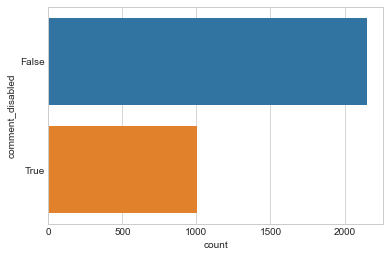

In [53]:
sns.countplot(data=train,y='comment_disabled')

# Like dislike disabled

In [54]:
train['like dislike disabled'].unique()

array(['FALSE', 'TRUE'], dtype=object)

In [55]:
len(train)

3155

In [56]:
train['like dislike disabled'].replace('TRUE',True,inplace=True)
train['like dislike disabled'].replace('FALSE',False,inplace=True)
np.dtype(train['like dislike disabled'])

dtype('bool')

<AxesSubplot:xlabel='count', ylabel='like dislike disabled'>

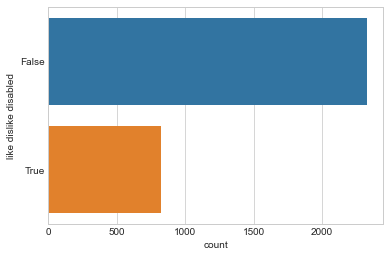

In [57]:
sns.countplot(data=train,y='like dislike disabled')

# Like and dislike

In [58]:
train['likes'].isna().sum()

0

In [59]:
train['dislike'].isna().sum()

0

In [60]:
len(train[train['likes']=='0'])

826

In [61]:
len(train[train['dislike']=='0'])

827

In [62]:
len(train[train['like dislike disabled']==True])

826

In [63]:
train['likes']=train['likes'].astype('int64')
print(np.dtype(train['likes']))

int64


In [64]:
train['dislike']=train['dislike'].astype('int64')
print(np.dtype(train['dislike']))

int64


# tag appered in title

In [65]:
train['tag appered in title'].unique()

array([False, True, nan], dtype=object)

In [66]:
train['tag appered in title'].isna().sum()

1

In [67]:
train = train.dropna(subset=['tag appered in title'])
len(train)

3154

In [68]:
train['tag appered in title'].unique()

array([False, True], dtype=object)

In [69]:

train['tag appered in title'].astype('bool')
np.dtype(train['tag appered in title'])

dtype('O')

# views

In [70]:
train['views'].unique()

array(['1978978', '1487870', '1502102', ..., '244022', '907340', '465531'],
      dtype=object)

In [71]:
len(train['views'])

3154

In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3154 entries, 0 to 3197
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Video_id               3154 non-null   object 
 1   category_id            3154 non-null   int64  
 2   channel_title          3154 non-null   object 
 3   subscriber             3154 non-null   float64
 4   title                  3154 non-null   object 
 5   tags                   3007 non-null   object 
 6   description            3090 non-null   object 
 7   Trend_day_count        3154 non-null   float64
 8   Tag_count              3154 non-null   int64  
 9   Trend_tag_count        3154 non-null   int64  
 10  comment_count          3154 non-null   int64  
 11  comment_disabled       3154 non-null   bool   
 12  like dislike disabled  3154 non-null   bool   
 13  likes                  3154 non-null   int64  
 14  dislike                3154 non-null   int64  
 15  tag 

In [73]:
train.describe()

,category_id,subscriber,Trend_day_count,Tag_count,Trend_tag_count,comment_count,likes,dislike
count,3154.000000,3.154000e+03,3154.000000,3154.000000,3154.000000,3154.000000,3.154000e+03,3154.000000
mean,20.362080,3.825669e+06,6.577679,16.606848,4.021877,112531.076411,9.795018e+03,5797.046607
std,7.343472,2.875081e+07,3.442494,5.219583,1.984677,101863.899169,2.254155e+04,4859.727987
min,1.000000,0.000000e+00,1.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000
25%,17.000000,2.428800e+05,4.000000,12.000000,2.000000,0.000000,0.000000e+00,0.000000
50%,24.000000,1.215014e+06,7.000000,17.000000,4.000000,99926.000000,1.023550e+04,5386.000000
75%,25.000000,3.814833e+06,10.000000,21.000000,6.000000,203133.500000,1.506075e+04,10053.500000
max,43.000000,1.576229e+09,12.000000,25.000000,7.000000,299877.000000,1.213628e+06,14858.000000


# Save to a file (Cleaned data)

In [74]:
# train.to_csv('youtube_cleaned.csv',index=False)

In [75]:
df = pd.read_csv('youtube_cleaned.csv')

In [76]:
df.head()

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views
0,HDR9SQc79,22,CaseyNeistat,9086142.0,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,6.0,21,6,0,True,False,13342,6089,False,1978978
1,KNH52UF?48,24,LastWeekTonight,5937292.0,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",1.0,23,1,116266,False,False,5761,3044,False,1487870
2,QTW28IRG36,23,Rudy Mancuso,4191209.0,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,10.0,22,3,257850,False,True,0,0,True,1502102
3,MGL76WI]26,24,Good Mythical Morning,13186408.0,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,Today we find out if Link is a Nickelback amat...,12.0,17,5,263939,False,True,0,0,True,3519302
4,TWP93KXT70,24,nigahiga,20563106.0,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,I know it's been a while since we did this sho...,11.0,15,7,268085,False,True,0,0,True,4835374


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3154 entries, 0 to 3153
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Video_id               3154 non-null   object 
 1   category_id            3154 non-null   int64  
 2   channel_title          3154 non-null   object 
 3   subscriber             3154 non-null   float64
 4   title                  3154 non-null   object 
 5   tags                   3007 non-null   object 
 6   description            3090 non-null   object 
 7   Trend_day_count        3154 non-null   float64
 8   Tag_count              3154 non-null   int64  
 9   Trend_tag_count        3154 non-null   int64  
 10  comment_count          3154 non-null   int64  
 11  comment_disabled       3154 non-null   bool   
 12  like dislike disabled  3154 non-null   bool   
 13  likes                  3154 non-null   int64  
 14  dislike                3154 non-null   int64  
 15  tag 

# Data Visualization

In [78]:
df = pd.read_csv('youtube_cleaned.csv')

In [79]:
df1 = df[['category_id','Trend_day_count']]
df1 = df1.groupby('category_id').sum()
df1.head()

,Trend_day_count
category_id,
1,1109.0
2,266.0
10,2712.0
15,474.0
17,1282.0


<AxesSubplot:xlabel='category_id', ylabel='Trend_day_count'>

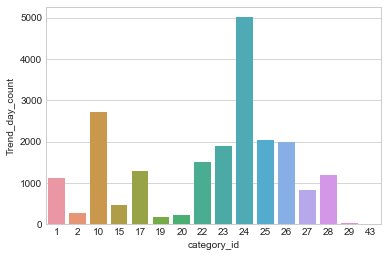

In [80]:
sns.barplot(x=df1.index,y='Trend_day_count',data=df1)

In [81]:
df3 = df[['tag appered in title','Trend_day_count']].groupby('tag appered in title').sum()
df3

,Trend_day_count
tag appered in title,
False,7090.0
True,13656.0


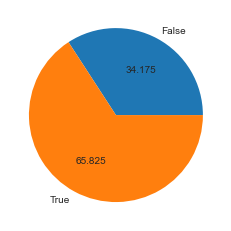

In [82]:
plt.pie(df3['Trend_day_count'],labels=df3.index,autopct='%.3f')
plt.show()

In [83]:
df=df[~(df.views>1e7)]

In [84]:
df.drop(list(df[df['subscriber']>df.subscriber.quantile(.999)].index),inplace=True)

In [85]:
df.shape

(3147, 17)

<AxesSubplot:xlabel='subscriber', ylabel='views'>

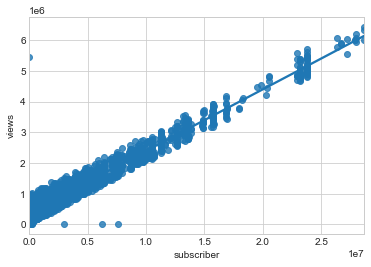

In [86]:
sns.regplot(x='subscriber',y='views',data=df)

In [87]:
df.drop(['comment_disabled','like dislike disabled'],inplace=True,axis=1)

In [88]:
df.head()

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,likes,dislike,tag appered in title,views
0,HDR9SQc79,22,CaseyNeistat,9086142.0,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,6.0,21,6,0,13342,6089,False,1978978
1,KNH52UF?48,24,LastWeekTonight,5937292.0,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",1.0,23,1,116266,5761,3044,False,1487870
2,QTW28IRG36,23,Rudy Mancuso,4191209.0,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,10.0,22,3,257850,0,0,True,1502102
3,MGL76WI]26,24,Good Mythical Morning,13186408.0,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,Today we find out if Link is a Nickelback amat...,12.0,17,5,263939,0,0,True,3519302
4,TWP93KXT70,24,nigahiga,20563106.0,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,I know it's been a while since we did this sho...,11.0,15,7,268085,0,0,True,4835374


<AxesSubplot:xlabel='category_id', ylabel='likes'>

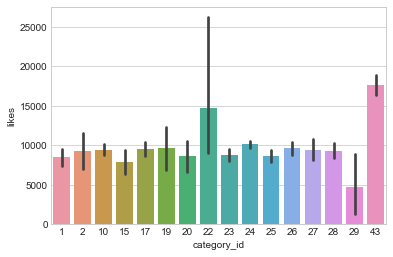

In [89]:
sns.barplot(x='category_id',y='likes',data=df)

In [90]:
df.shape

(3147, 15)

In [91]:
outliers = df[df['views'] > (df['views'].mean() + 3 * df['views'].std())]
outliers

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,likes,dislike,tag appered in title,views
4,TWP93KXT70,24,nigahiga,20563106.0,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,I know it's been a while since we did this sho...,11.0,15,7,268085,0,0,True,4835374
31,JUF70OM?78,10,EminemVEVO,80.0,Eminem - Walk On Water (Audio) ft. Beyoncé,Eminem|Walk|On|Water|Aftermath/Shady/Interscop...,Eminem's new track Walk on Water ft. Beyoncé i...,1.0,20,1,44817,10563,4259,False,5459523
48,HOU55BHS75,24,FBE,16874196.0,"ELDERS REACT TO iPHONE X (Facial Recognition, ...",iPhone X|animojis|facial recognition|ELDERS RE...,"iPhone X (Facial Recognition, Animojis) reacte...",9.0,10,3,254649,13568,6060,True,4108108
51,DVF66YAa29,17,WWE,23182596.0,"Wildest Superstar distractions: WWE Top 10, No...",wwe|world wrestling entertainment|wrestling|wr...,A timely distraction can create real trouble f...,4.0,14,2,33124,7281,4991,True,4818957
61,BDT46LFj5,24,YouTube Spotlight,27221198.0,#VeteransDay: Thank You for Everything,vets|veterans day|veterans|youtube|veteransday...,"This #VeteransDay, we want to say thank you to...",3.0,25,6,0,10227,2920,True,5534788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,NAW79XTQ23,17,WWE,23182596.0,"The Undertaker returns: Raw 25, Jan. 22, 2018",wwe|world wrestling entertainment|wrestling|wr...,"On Raw's 25th Anniversary, The Deadman emerges...",4.0,10,2,253317,17224,12584,True,5329267
2996,ZGK86VQM32,23,Smosh,22919161.0,EVERY GAME STORE EVER,gamestore|game store|gamestop|every gamestop e...,Video Game Stores - whether it's getting rippe...,3.0,19,3,75425,8165,5189,True,4819662
3048,EQM80QUA86,17,WWE,23182596.0,D-Generation X and Scott Hall share a Too Swee...,wwe|world wrestling entertainment|wrestling|wr...,Every member of D-Generation X and Kliq member...,8.0,20,5,0,0,0,True,4689206
3127,KTO59HRN57,10,shakiraVEVO,19537583.0,Shakira - Trap (Official Video) ft. Maluma,Shakira ft. Maluma|Shakira ft. Maluma Music|Sh...,Shakira feat. Maluma - Trap (Official Music Vi...,6.0,24,3,241746,5280,1969,True,4478605


In [93]:
df=df[~(df.likes>1e6)]

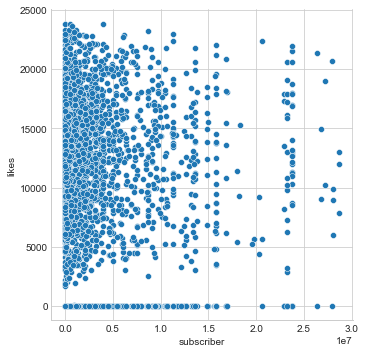

In [104]:
sns.relplot(x='subscriber',y='likes',data=df,markers='x',palette='r')

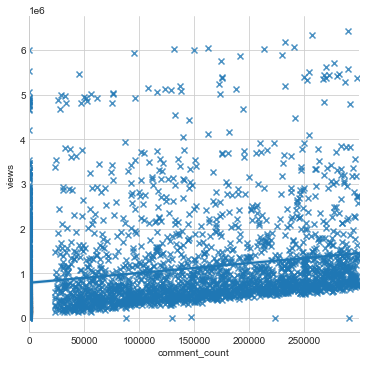

In [108]:
sns.lmplot(x='comment_count',y='views',data=df,markers='x',palette='r')

<AxesSubplot:xlabel='category_id', ylabel='views'>

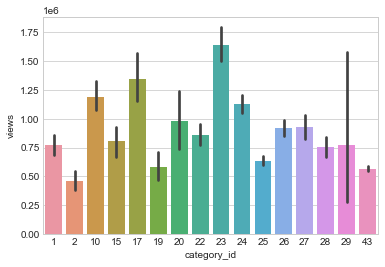

In [113]:
sns.barplot(x='category_id',y='views',data=df)

In [128]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


In [109]:
df.head()

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,likes,dislike,tag appered in title,views
0,HDR9SQc79,22,CaseyNeistat,9086142.0,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,6.0,21,6,0,13342,6089,False,1978978
1,KNH52UF?48,24,LastWeekTonight,5937292.0,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",1.0,23,1,116266,5761,3044,False,1487870
2,QTW28IRG36,23,Rudy Mancuso,4191209.0,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,10.0,22,3,257850,0,0,True,1502102
3,MGL76WI]26,24,Good Mythical Morning,13186408.0,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,Today we find out if Link is a Nickelback amat...,12.0,17,5,263939,0,0,True,3519302
4,TWP93KXT70,24,nigahiga,20563106.0,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,I know it's been a while since we did this sho...,11.0,15,7,268085,0,0,True,4835374


In [118]:
y = df['views']
y.head()

0    1978978
1    1487870
2    1502102
3    3519302
4    4835374
Name: views, dtype: int64

In [121]:
X = df[['category_id','subscriber','Trend_day_count']]
X.head()

,category_id,subscriber,Trend_day_count
0,22,9086142.0,6.0
1,24,5937292.0,1.0
2,23,4191209.0,10.0
3,24,13186408.0,12.0
4,24,20563106.0,11.0


In [122]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

In [125]:
Rf =RandomForestRegressor()
Rf.fit(X_train,y_train)
pred = Rf.predict(X_test)

In [124]:
from sklearn.metrics import r2_score

In [127]:
Rf.score(X, y)

0.9773828743071352

In [126]:
r2_score(y_test,pred)

0.9389323068881407